In [2]:
import os
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import gmean

In [4]:
path_no_restarts = '../outputs/output_test/'
path_restarts = '../outputs/output_test_restart/'
path_agressive = '../outputs/output_test_agressive/'
names = []
mean_no_restarts = []
mean_restarts = []
mean_agressive = []
for file in glob(path_no_restarts + "*/*/*.result", recursive=False):
    name = file.replace(path_no_restarts, "")
    name = name.split(".cnf")[0]
    name = name + ".cnf"
    names.append(name)
    
    mean_no_restarts.append(np.loadtxt(file, usecols=0).mean())
    
    restart_file = glob(path_restarts + name + "*")[0]
    mean_restarts.append(np.loadtxt(restart_file, usecols=0).mean())
    
    agressive_file = glob(path_agressive + name + "*")[0]
    mean_agressive.append(np.loadtxt(agressive_file, usecols=0).mean())

In [5]:
df = pd.DataFrame({'no_restarts':mean_no_restarts, 'with_restarts':mean_restarts, 'agressive':mean_agressive}, index=names)

In [6]:
df.to_csv('compare_no_restart_to_restart.csv')

In [7]:
A = df['with_restarts']/df['agressive']

In [8]:
gmean(A)

3.7730723505153483

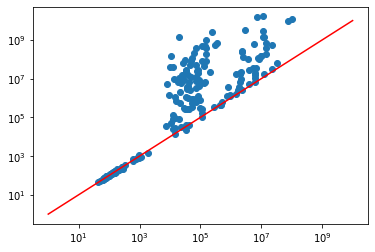

In [9]:
plt.scatter(mean_restarts, mean_no_restarts)
plt.plot([1,10**10], [1,10**10], 'r')
plt.xscale('log')
plt.yscale('log')

In [10]:
m = np.mean(np.log(df['no_restarts']) - np.log(df['with_restarts']))

In [11]:
m

2.6030318042649845

In [12]:
np.exp(m)

13.504619394223905

In [13]:
np.mean(df['no_restarts'])

380861106.76901674

In [14]:
np.mean(df['with_restarts'])

2448790.546116667

In [15]:
np.mean(df['no_restarts'])/np.mean(df['with_restarts'])

155.53029121783922

# Calculate speedup for the agressive strategy on all instances

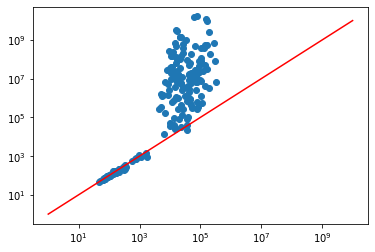

In [16]:
plt.scatter(mean_agressive, mean_no_restarts)
plt.plot([1,10**10], [1,10**10], 'r')
plt.xscale('log')
plt.yscale('log')

In [17]:
B = df['no_restarts']/df['agressive']

In [18]:
gmean(B)

50.95390604057955

In [19]:
min(mean_no_restarts)

47.596666666666664

In [20]:
for x,y in zip(mean_agressive, mean_no_restarts):
    print(x, y)

53223.056666666664 11027184.53
19070.426666666666 82992.41
45339.71 872376.5933333334
37356.346666666665 710503.1
23071.376666666667 5804046.783333333
62257.48333333333 15189472366.876667
41578.683333333334 2071180.3333333333
156905.46333333335 12072285325.233334
9801.766666666666 50273.66
82621.9 20178551.36
16688.55 23632995.913333334
12042.716666666667 39746219.69
73458.68666666666 15004967.726666667
6482.1866666666665 14276.12
53124.573333333334 288983.79333333333
48935.543333333335 438021.87333333335
18770.42 16884745.30666667
6922.79 174816.66666666666
21776.226666666666 36597071.88333333
86461.46666666666 82072330.90666667
23456.506666666668 5437291.036666667
24803.713333333333 2520516.73
69634.34666666666 11631257.533333333
161527.03 9629880877.62
35636.18 41274.263333333336
14215.413333333334 26744.766666666666
336184.01666666666 6554089.88
42204.19666666666 8528303.146666666
13964.433333333332 97984.99666666667
19164.77666666667 12223639.35
72046.13333333333 26437955.95333333

# Calculate speedup on two component mixtures

In [21]:
from exp_mixture_model import EMM

## Get data

In [22]:
path_no_restarts = '../outputs/output_test/'
names = []
no_restarts = []
for file in glob(path_no_restarts + "*/*/*.result", recursive=False):
    name = file.replace(path_no_restarts, "")
    name = name.split(".cnf")[0]
    name = name + ".cnf"
    names.append(name)
    
    no_restarts.append(np.sort(np.loadtxt(file, usecols=0)))

In [23]:
no_restarts_all_df = pd.DataFrame(no_restarts, index=names)

## Filter instances with just one component; compute speedup on the rest

In [24]:
speedups = []
for index, row in no_restarts_all_df.iterrows():
    model = EMM(k=2)
    pi, mu = model.fit(row)
    if pi[0] < 1.0:
        temp = df.loc[index] 
        speedups.append(temp['no_restarts']/temp['agressive'])
    else:
        print(f"skipped instance {index}")
        
print(speedups)

'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.


skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3660155615.cnf
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3721854806.cnf
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3833151894.cnf
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3318206855.cnf
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3325204331.cnf
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3391284424.cnf
'x' contains 0, which has been removed.
'x' contains 0, which has been removed.
skipped instance qhid/n50/gen_n50_m275_k3SAT_seed3470962

In [25]:
gmean(speedups)

307.5039550982809

In [26]:
len(speedups)

131

In [27]:
np.sort(speedups)

array([8.62668551e-01, 1.00019553e+00, 1.03973228e+00, 1.07495891e+00,
       1.19267074e+00, 1.88139212e+00, 2.20236175e+00, 2.83108447e+00,
       3.17988473e+00, 3.72993929e+00, 3.81436044e+00, 4.35189057e+00,
       4.44122048e+00, 4.96066989e+00, 5.12904068e+00, 5.43973862e+00,
       5.64980225e+00, 7.01675423e+00, 8.25729924e+00, 8.95099642e+00,
       9.90799442e+00, 1.17548327e+01, 1.26551945e+01, 1.52074298e+01,
       1.75257727e+01, 1.90196088e+01, 1.92408949e+01, 1.94955428e+01,
       1.97392554e+01, 2.05815890e+01, 2.52523429e+01, 2.83306854e+01,
       2.88328503e+01, 3.55193228e+01, 3.92311217e+01, 4.98135142e+01,
       5.14236422e+01, 5.62871001e+01, 5.68402672e+01, 6.56361995e+01,
       6.70351781e+01, 6.78753841e+01, 7.05128909e+01, 7.11276399e+01,
       8.58613603e+01, 8.85260029e+01, 8.85327230e+01, 9.96919799e+01,
       1.00919280e+02, 1.01618524e+02, 1.17804721e+02, 1.34693788e+02,
       1.66970436e+02, 1.67033340e+02, 1.79018344e+02, 1.92497653e+02,
      